In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset_file = '../datasets/Wage.csv'
data = pd.read_csv(dataset_file, index_col=0)
data = data.drop(['region'], axis=1)
data = pd.concat([data, pd.get_dummies(data.maritl)], axis=1).drop(['maritl', '5. Separated'], axis=1)
data = pd.concat([data, pd.get_dummies(data.race)], axis=1).drop(['race', '4. Other'], axis=1)
data = pd.concat([data, pd.get_dummies(data.education)], axis=1).drop(['education', '5. Advanced Degree'], axis=1)
data['job_industrial'] = data.jobclass.apply(lambda v: 1 if v.startswith('1') else 0)
data = data.drop(['jobclass'], axis=1)
data['health_good'] = data.health.apply(lambda v: 1 if v.startswith('1') else 0)
data = data.drop(['health'], axis=1)
data['health_ins'] = data.health_ins.apply(lambda v: 1 if v.startswith('1') else 0)
data.head()

,year,age,health_ins,logwage,wage,1. Never Married,2. Married,3. Widowed,4. Divorced,1. White,2. Black,3. Asian,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,job_industrial,health_good
231655,2006,18,0,4.318063,75.043154,1,0,0,0,1,0,0,1,0,0,0,1,1
86582,2004,24,0,4.255273,70.476020,1,0,0,0,1,0,0,0,0,0,1,0,0
161300,2003,45,1,4.875061,130.982177,0,1,0,0,1,0,0,0,0,1,0,1,1
155159,2003,43,1,5.041393,154.685293,0,1,0,0,0,0,1,0,0,0,1,0,0
11443,2005,50,1,4.318063,75.043154,0,0,0,1,1,0,0,0,1,0,0,0,1


In [3]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [4]:
poly_age = PolynomialFeatures(degree=4).fit_transform(data.age.to_frame())
poly_age.shape

(3000, 5)

In [5]:
model = sm.OLS(data.wage, poly_age).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           2.77e-57
Time:                        20:22:41   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.002    -301.879     -66.430
x1            21.2455      5.887      3.609      0.000       9.703      32.788
x2            -0.5639      0.206     -2.736      0.006      -0.968      -0.160
x3             0.0068      0.003      2.221      0.026       0.001       0.013
x4         -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
age_for_plot = np.arange(data.age.min(), data.age.max()).reshape(-1, 1)
age_for_plot = PolynomialFeatures(degree=4).fit_transform(age_for_plot)
pred_res = model.get_prediction(age_for_plot).summary_frame()

In [29]:
pred_res.columns

Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper'], dtype='object')

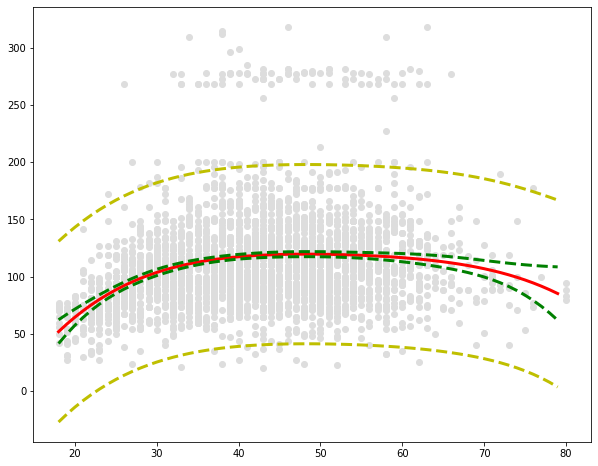

In [25]:
plt.figure(figsize=(10,8))
plt.plot(data.age, data.wage, 'o', c='#dddddd')
plt.plot(age_for_plot[:, 1], pred_res['mean'], color='r', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['mean_ci_lower'], 'g--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['mean_ci_upper'], 'g--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['obs_ci_lower'], 'y--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['obs_ci_upper'], 'y--', lw=3)

In [9]:
from statsmodels.stats.anova import anova_lm

In [11]:
model = sm.OLS(data.wage, PolynomialFeatures(degree=5).fit_transform(data.age.to_frame())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     56.71
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.67e-56
Time:                        20:47:52   Log-Likelihood:                -15314.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2994   BIC:                         3.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.7046    161.435     -0.308      0.758    -366.239     266.830
x1             3.9930     20.110      0.199      0.843     -35.438      43.424
x2             0.2760      0.958      0.288      0.773      -1.603       2.155
x3            -0.0126      0.022     -0.577      0.564      -0.056       0.030
x4             0.0002      0.000      0.762      0.446      -0.000       0.001
x5         -9.157e-07   1.02e-06     -0.897      0.370   -2.92e-06    1.09e-06
==============================================================================
Omnibus:                     1094.840   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4940.229
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       8.265   Cond. No.                     9.39e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
models = [sm.OLS(data.wage, PolynomialFeatures(degree=i).fit_transform(data.age.to_frame())).fit() for i in range(1, 6)]
anova_lm(*models)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [13]:
model = sm.OLS(data.wage, PolynomialFeatures(degree=5).fit_transform(data.age.to_frame())).fit()
model.pvalues

const    0.758186
x1       0.842621
x2       0.773420
x3       0.563669
x4       0.446096
x5       0.369682
dtype: float64

In [30]:
model = sm.GLM(
    endog=data.wage>250,
    exog=PolynomialFeatures(degree=4).fit_transform(data.age.to_frame()),
    family=sm.families.Binomial()
).fit()
pred_res = model.get_prediction(age_for_plot).summary_frame()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Tue, 22 Sep 2020   Deviance:                       701.22
Time:                        21:38:38   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.022    -202.956     -16.150
x1             8.9950      4.187      2.148      0.032       0.789      17.201
x2            -0.2816      0.135     -2.081      0.037      -0.547      -0.016
x3             0.0039      0.002      2.022      0.043       0.000       0.008
x4         -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
==============================================================================
"""

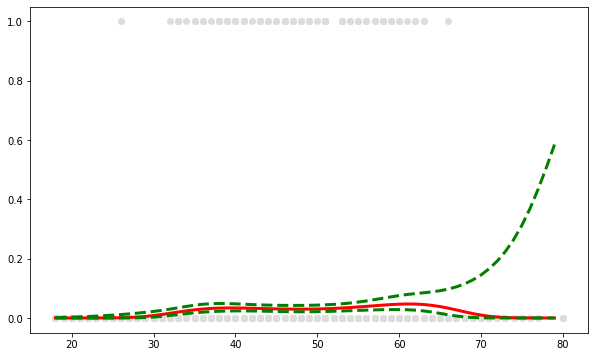

In [33]:
plt.figure(figsize=(10,6))
plt.plot(data.age, data.wage>250, 'o', c='#dddddd')
plt.plot(age_for_plot[:, 1], pred_res['mean'], color='r', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['mean_ci_lower'], 'g--', lw=3)
plt.plot(age_for_plot[:, 1], pred_res['mean_ci_upper'], 'g--', lw=3)

In [49]:
cut_age = pd.cut(data.age, 4)
cut_age = pd.get_dummies(cut_age).iloc[:, 1:]

In [51]:
model = sm.GLM(
    endog=data.wage>250,
    exog=sm.add_constant(cut_age),
    family=sm.families.Binomial()
).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -354.85
Date:                Tue, 22 Sep 2020   Deviance:                       709.69
Time:                        22:03:20   Pearson chi2:                 3.00e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.0039      0.449    -11.152      0.000      -5.883      -4.124
(33.5, 49.0]     1.5998      0.474      3.378      0.001       0.672       2.528
(49.0, 64.5]     1.7147      0.488      3.512      0.000       0.758       2.672
(64.5, 80.0]     0.7413      1.102      0.672      0.501      -1.420       2.902
================================================================================
"""

In [61]:
from scipy import interpolate

In [63]:
age_for_plot = np.arange(data.age.min(), data.age.max()).reshape(-1, 1)
tck1 = interpolate.splrep(
    data.sort_values(by='age').age,
    data.sort_values(by='age').wage,
    s=0, t=[25,40,60]
)
pred1 = interpolate.splev(age_for_plot, tck1)
tck1

(array([18., 18., 18., 18., 25., 40., 60., 80., 80., 80., 80.]),
 array([ 60.49371419,  64.47421387, 105.12469402, 123.33250174,
        116.4845442 , 111.18181194,  77.09985645,   0.        ,
          0.        ,   0.        ,   0.        ]),
 3)

In [64]:
tck2 = interpolate.splrep(
    data.sort_values(by='age').age,
    data.sort_values(by='age').wage,
    s=0, t=data.age.describe()[['25%', '50%', '75%']]
)
pred2 = interpolate.splev(age_for_plot, tck2)
tck2

(array([18.  , 18.  , 18.  , 18.  , 33.75, 42.  , 51.  , 80.  , 80.  ,
        80.  , 80.  ]),
 array([ 56.31384072,  84.13784291, 110.37638717, 122.14223191,
        112.12657468, 128.44531336,  71.0647164 ,   0.        ,
          0.        ,   0.        ,   0.        ]),
 3)

In [67]:
tck3 = interpolate.splrep(
    data.sort_values(by='age').age,
    data.sort_values(by='age').wage,
    s=3, t=data.age.describe()[['25%', '50%', '75%']]
)
pred3 = interpolate.splev(age_for_plot, tck3)
tck3

(array([18.  , 18.  , 18.  , 18.  , 33.75, 42.  , 51.  , 80.  , 80.  ,
        80.  , 80.  ]),
 array([ 56.31384072,  84.13784291, 110.37638717, 122.14223191,
        112.12657468, 128.44531336,  71.0647164 ,   0.        ,
          0.        ,   0.        ,   0.        ]),
 3)

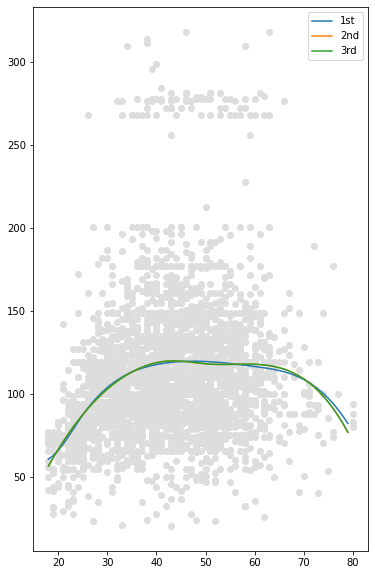

In [69]:
plt.figure(figsize=(6, 10))
plt.plot(data.age, data.wage, 'o', c='#dddddd')
plt.plot(age_for_plot, pred1, label='1st')
plt.plot(age_for_plot, pred2, label='2nd')
plt.plot(age_for_plot, pred3, label='3rd')
plt.legend()

In [70]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [83]:
data_sorted = data.sort_values(by='age')
pred1 = lowess(data_sorted.wage, data_sorted.age, frac=0.2, return_sorted=False)
pred2 = lowess(data_sorted.wage, data_sorted.age, frac=0.5, return_sorted=False)
pred3 = lowess(data_sorted.wage, data_sorted.age, frac=0.8, return_sorted=False)

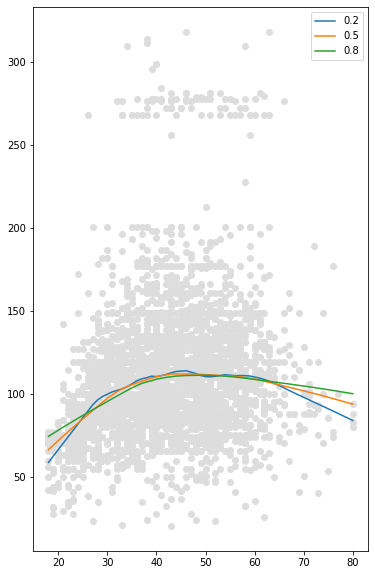

In [84]:
plt.figure(figsize=(6, 10))
plt.plot(data_sorted.age, data_sorted.wage, 'o', c='#dddddd')
plt.plot(data_sorted.age, pred1, label='0.2')
plt.plot(data_sorted.age, pred2, label='0.5')
plt.plot(data_sorted.age, pred3, label='0.8')
plt.legend()